In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('SpaData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6514 non-null   int64  
 1   TimeStamp         6514 non-null   object 
 2   Temperature       6514 non-null   float64
 3   RelativeHumidity  6514 non-null   float64
 4   Light             6514 non-null   float64
 5   OxygenLevels      6514 non-null   float64
 6   HumidityRatio     6514 non-null   float64
 7   GTOccupancy       6514 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 407.2+ KB


In [4]:
df['ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2342
1       6419
2       3330
3       7188
4       7655
        ... 
6509    7362
6510    1591
6511    4629
6512    3657
6513    7983
Name: ID, Length: 6514, dtype: int64>

In [5]:
correlation=df.corr()
correlation['GTOccupancy'].sort_values(ascending=False)

GTOccupancy         1.000000
Light               0.910707
OxygenLevels        0.711426
Temperature         0.544737
HumidityRatio       0.293591
RelativeHumidity    0.123522
ID                 -0.111496
Name: GTOccupancy, dtype: float64

In [6]:
df.drop('ID', axis=1, inplace=True)
df.reset_index(drop=True)
df

,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,06-02-15 8:51,20.840,19.745000,433.0,629.750000,0.003000,1
1,09-02-15 4:49,19.290,26.890000,0.0,466.000000,0.003716,0
2,07-02-15 1:20,20.000,18.700000,0.0,435.500000,0.002696,0
3,09-02-15 17:38,22.200,38.433333,429.5,1943.500000,0.006381,1
4,10-02-15 1:25,20.245,32.900000,0.0,469.000000,0.004833,0
...,...,...,...,...,...,...,...
6509,09-02-15 20:31,20.500,34.590000,0.0,868.500000,0.005164,0
6510,05-02-15 20:21,21.200,19.340000,0.0,483.500000,0.003004,0
6511,07-02-15 22:59,19.600,28.600000,0.0,435.000000,0.004031,0
6512,07-02-15 6:47,19.760,19.230000,0.0,450.333333,0.002732,0


In [7]:
training_target_df=df.GTOccupancy[:6000]

In [8]:
testing_target_df=df.GTOccupancy[6000:]

In [9]:
testing_target_df

6000    0
6001    0
6002    1
6003    1
6004    0
       ..
6509    0
6510    0
6511    0
6512    0
6513    0
Name: GTOccupancy, Length: 514, dtype: int64

In [10]:
training_df=df.drop(['GTOccupancy', 'TimeStamp'], axis=1)

In [11]:
#training_data_df=training_df[:4000]
#testing_data_df=training_df[4000:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale=MinMaxScaler()
scaled_training_data=scale.fit_transform(training_df)
scaled_training_data

array([[0.44019139, 0.13251121, 0.28001725, 0.13430296, 0.08570667],
       [0.06937799, 0.4529148 , 0.        , 0.03295683, 0.27403005],
       [0.23923445, 0.08565022, 0.        , 0.01408015, 0.00582895],
       ...,
       [0.14354067, 0.52959641, 0.        , 0.01377069, 0.35696178],
       [0.18181818, 0.10941704, 0.        , 0.02326061, 0.01519825],
       [0.28708134, 0.72959641, 0.        , 0.01892826, 0.57041137]])

In [14]:
training_data_df=scaled_training_data[:6000]
testing_data_df=scaled_training_data[6000:]

In [15]:
len(training_data_df),len(testing_data_df)


(6000, 514)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()

## Hyper parameter tuning 

In [30]:
#no. of random trees to be formed
n_estimators=[int(x) for x in np.linspace(start=10, stop=500, num=5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 132, 255, 377, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf=RandomForestClassifier()

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_clf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [35]:
rf_RandomGrid.fit(training_data_df, training_target_df)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   50.3s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 132, 255, 377,
                                                         500]},
                   verbose=2)

In [36]:
rf_RandomGrid.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5,
 'bootstrap': False}

In [37]:
print (f'Train Accuracy - : {rf_RandomGrid.score(training_data_df, training_target_df):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(testing_data_df, testing_target_df):.3f}')

Train Accuracy - : 0.995
Test Accuracy - : 0.986


In [42]:
predicted=rf_RandomGrid.predict(testing_data_df)

In [38]:
from sklearn.metrics import confusion_matrix

In [43]:
cnf_mat=confusion_matrix(testing_target_df, predicted)

In [44]:
cnf_mat

array([[411,   6],
       [  1,  96]], dtype=int64)

Text(69.0, 0.5, 'Truth')

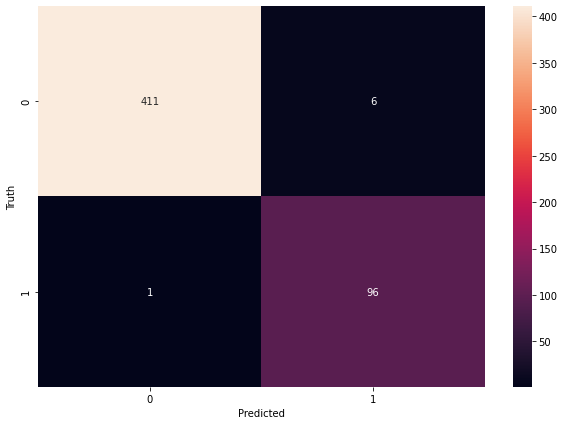

In [45]:
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=testing_target_df,predictions=predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
f1_score=cnf_mat[1,1]/(cnf_mat[1,1] + ((cnf_mat[0,1]+cnf_mat[1,0])/2)) #manual calculation to find f1 score 
f1_score

0.964824120603015

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision=precision_score(testing_target_df, predicted)
recall=recall_score(testing_target_df, predicted)
f1=f1_score(testing_target_df, predicted)
precision,recall,f1

(0.9411764705882353, 0.9896907216494846, 0.964824120603015)